In [29]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_0Cg2vik8l1A.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@lamarmosby5893,It looks like Gears of war for ps5,2024-11-08T16:34:29Z,0,0
1,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@CodyRoss-e4t,Jw why your the one reviewing this where’s fal...,2024-11-07T11:36:24Z,0,0
2,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@Sted916boy,Game died so fast,2024-11-05T06:41:12Z,0,0
3,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@maxk6655,The game is f junk. People comparing to gear 5...,2024-11-04T22:36:56Z,0,0
4,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@GhostDust97,10 hour campaign!? for 60$ ? :000,2024-11-03T16:14:41Z,0,1
...,...,...,...,...,...,...,...,...
2735,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@devinhouston6090,Here,2024-09-04T17:23:20Z,0,0
2736,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@ShinobiWOLFER,Yes,2024-09-04T17:23:19Z,0,0
2737,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@yxng_xav7166,The video I’ve waited for,2024-09-04T17:23:17Z,1,6
2738,https://www.youtube.com/watch?v=0Cg2vik8l1A,Space Marine 2 - Before You Buy,2024-09-04T17:22:56Z,@Extinity_,First,2024-09-04T17:23:15Z,0,1


In [31]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ig n', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game", 
    "warhammer", "games", "buy", "40k", "gear","space", "marine", "gears", 
    "campaign", "video","space", "marine", "buy", "looks", 
    "people", "comparing", "junk", "fast", "died", "gears", "war", 
    "ps5", "hour", "dollar", "60","wait", "look", "fun", "great", "year", 
    "lot", "love", "fan", "jake", "multiplayer", "title", "person", "better", 
    "pa", "son", "finally", "also", "gon", "though", "ill", "getting", "lost", 
    "thanks", "late", "pre", "first", "hope", "want", "sold", "order", "lore", 
    "ordered", "bought", "already", "one", "thats", "server", "friend"
])
lmtzr = WordNetLemmatizer()

In [32]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [33]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
405,2024-09-11,I'm watching this after I bought it without ev...,bought without ever single warhammer game😂
406,2024-09-11,"Bro, am I the only one who thinks SM2 sucks? I...",bro one think sm2 suck play like absolute slug...
407,2024-09-11,Im a marine.. can confirm this is space,marine confirm space
408,2024-09-11,First chance at movement was spent slow walking,first chance movement spent slow walking
409,2024-09-11,"Looks pretty good, but I'll pass. Looks too mu...",look pretty good ill pas look like another gea...
...,...,...,...
2735,2024-09-04,Here,
2736,2024-09-04,Yes,yes
2737,2024-09-04,The video I’ve waited for,waited
2738,2024-09-04,First,first


In [34]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [35]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2024-09-04,i not going to buy it anyways. too overpriced....,going buy anyways overpriced there physical me...,positive
1,2024-09-10,As a huge 40K lore nerd. This game is on point...,huge 40k lore nerd game point many detail east...,positive
2,2024-09-05,Joining server,joining server,neutral
3,2024-09-04,WH40k always seemed like a b-tier cash grab fr...,wh40k seemed like btier cash grab franchise ev...,positive
4,2024-09-07,bought the ultra version let’s gooooo,bought ultra version let gooooo,neutral
...,...,...,...,...
495,2024-09-04,10 hours is A LOT,hour lot,neutral
496,2024-09-05,"Ngl, lost me at 10hrs. Im not into PVP so this...",ngl lost 10hrs pvp might,negative
497,2024-09-05,I like rollo but mark strong had a great voice,like rollo mark strong great voice,positive
498,2024-09-08,Game definitely looks like gears of war on ste...,game look like gear war steroid,negative


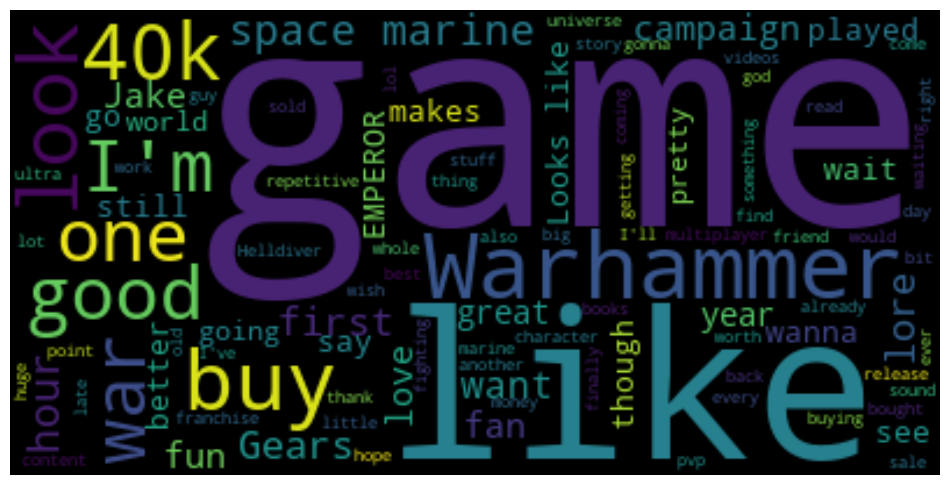

In [36]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

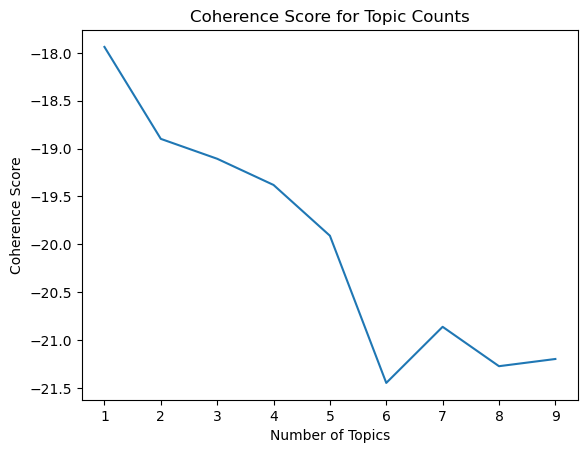

In [37]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [38]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 5
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.006*"repetitive" + 0.006*"helldivers" + 0.006*"wish" + 0.003*"big" + 0.003*"wan" + 0.003*"boy" + 0.003*"read" + 0.003*"would" + 0.003*"luetin" + 0.003*"pick"'), (1, '0.010*"emperor" + 0.004*"story" + 0.004*"guy" + 0.003*"happy" + 0.003*"goty" + 0.003*"sale" + 0.003*"matchmaking" + 0.003*"spent" + 0.003*"coop" + 0.003*"damn"'), (2, '0.005*"day" + 0.005*"still" + 0.004*"coop" + 0.004*"joining" + 0.003*"character" + 0.003*"early" + 0.003*"pirate" + 0.003*"anyone" + 0.003*"minute" + 0.003*"microtransactions"'), (3, '0.005*"welcome" + 0.004*"sound" + 0.004*"lol" + 0.003*"content" + 0.003*"quite" + 0.003*"world" + 0.003*"sequel" + 0.003*"short" + 0.003*"lack" + 0.003*"animation"'), (4, '0.005*"shit" + 0.004*"thing" + 0.004*"pvp" + 0.004*"repeat" + 0.004*"going" + 0.004*"terra" + 0.003*"nah" + 0.003*"later" + 0.003*"main" + 0.003*"thank"')]


After 5 topics, adding more topics seems to further reduce coherence, with the score staying very low from 6 to 9 topics.

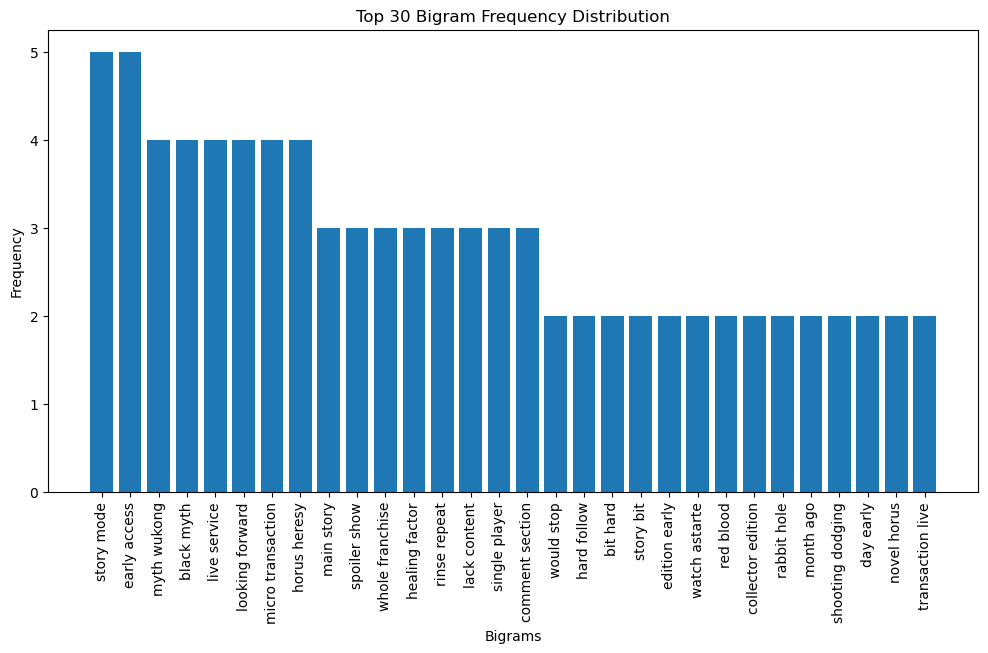

In [40]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [62]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
#df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_topics.to_csv(file_path, index=False)
#df_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
